<a href="https://colab.research.google.com/github/sujal003-hue/Upgrade-Capstone-Project/blob/main/Car_Price_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# **Loading Our Dataset**

In [ ]:
df = pd.read_csv("/content/archive (2).zip")

# **Display Top 5 Rows of Dataset**

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Display Last 5 Rows of Dataset**

In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# **Exploratory Data Analysis**

# **Find Shape of Our Dataset(Number of Rows and Number of Columns)**

In [ ]:
df.shape

(301, 9)

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


# **Check Null Value In The Dataset**

In [ ]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


**So, from above observation there is no null values in our dataset.**

# **Statistical Measure of Our Dataset**

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **Checking the Name of the Columns in Our Dataset**

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# **Number of Columns in our New Dataset**

In [ ]:
final_dataset = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

# **Display Top 5 Rows of New Dataset**

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Display Last 5 Rows of New Dataset**

In [ ]:
final_dataset.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# **Showing the Data which have(Current_Year)=2020**

In [ ]:
final_dataset['Current_Year'] = 2020

# **Display Top 5 Rows of Dataset**

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [ ]:
final_dataset['no_year'] = final_dataset['Current_Year'] - final_dataset['Year']

# **Display Top 5 Rows of Dataset**

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


# **Droping('Year') Column from the Dataset**

In [ ]:
final_dataset.drop(['Year'], axis=1, inplace=True)

# **Display Top 5 rows of Dataset**

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [ ]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

# **Display Top 5 Rows of Dataset**

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,False,True,False,True
1,4.75,9.54,43000,0,2020,7,True,False,False,True
2,7.25,9.85,6900,0,2020,3,False,True,False,True
3,2.85,4.15,5200,0,2020,9,False,True,False,True
4,4.60,6.87,42450,0,2020,6,True,False,False,True


# **Correlation Matrix of Various Columns in Dataset**

In [ ]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_year,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394,-0.098643,0.091013,0.063240,1.000000


# **Data Visualization of Every Columns in Dataset**

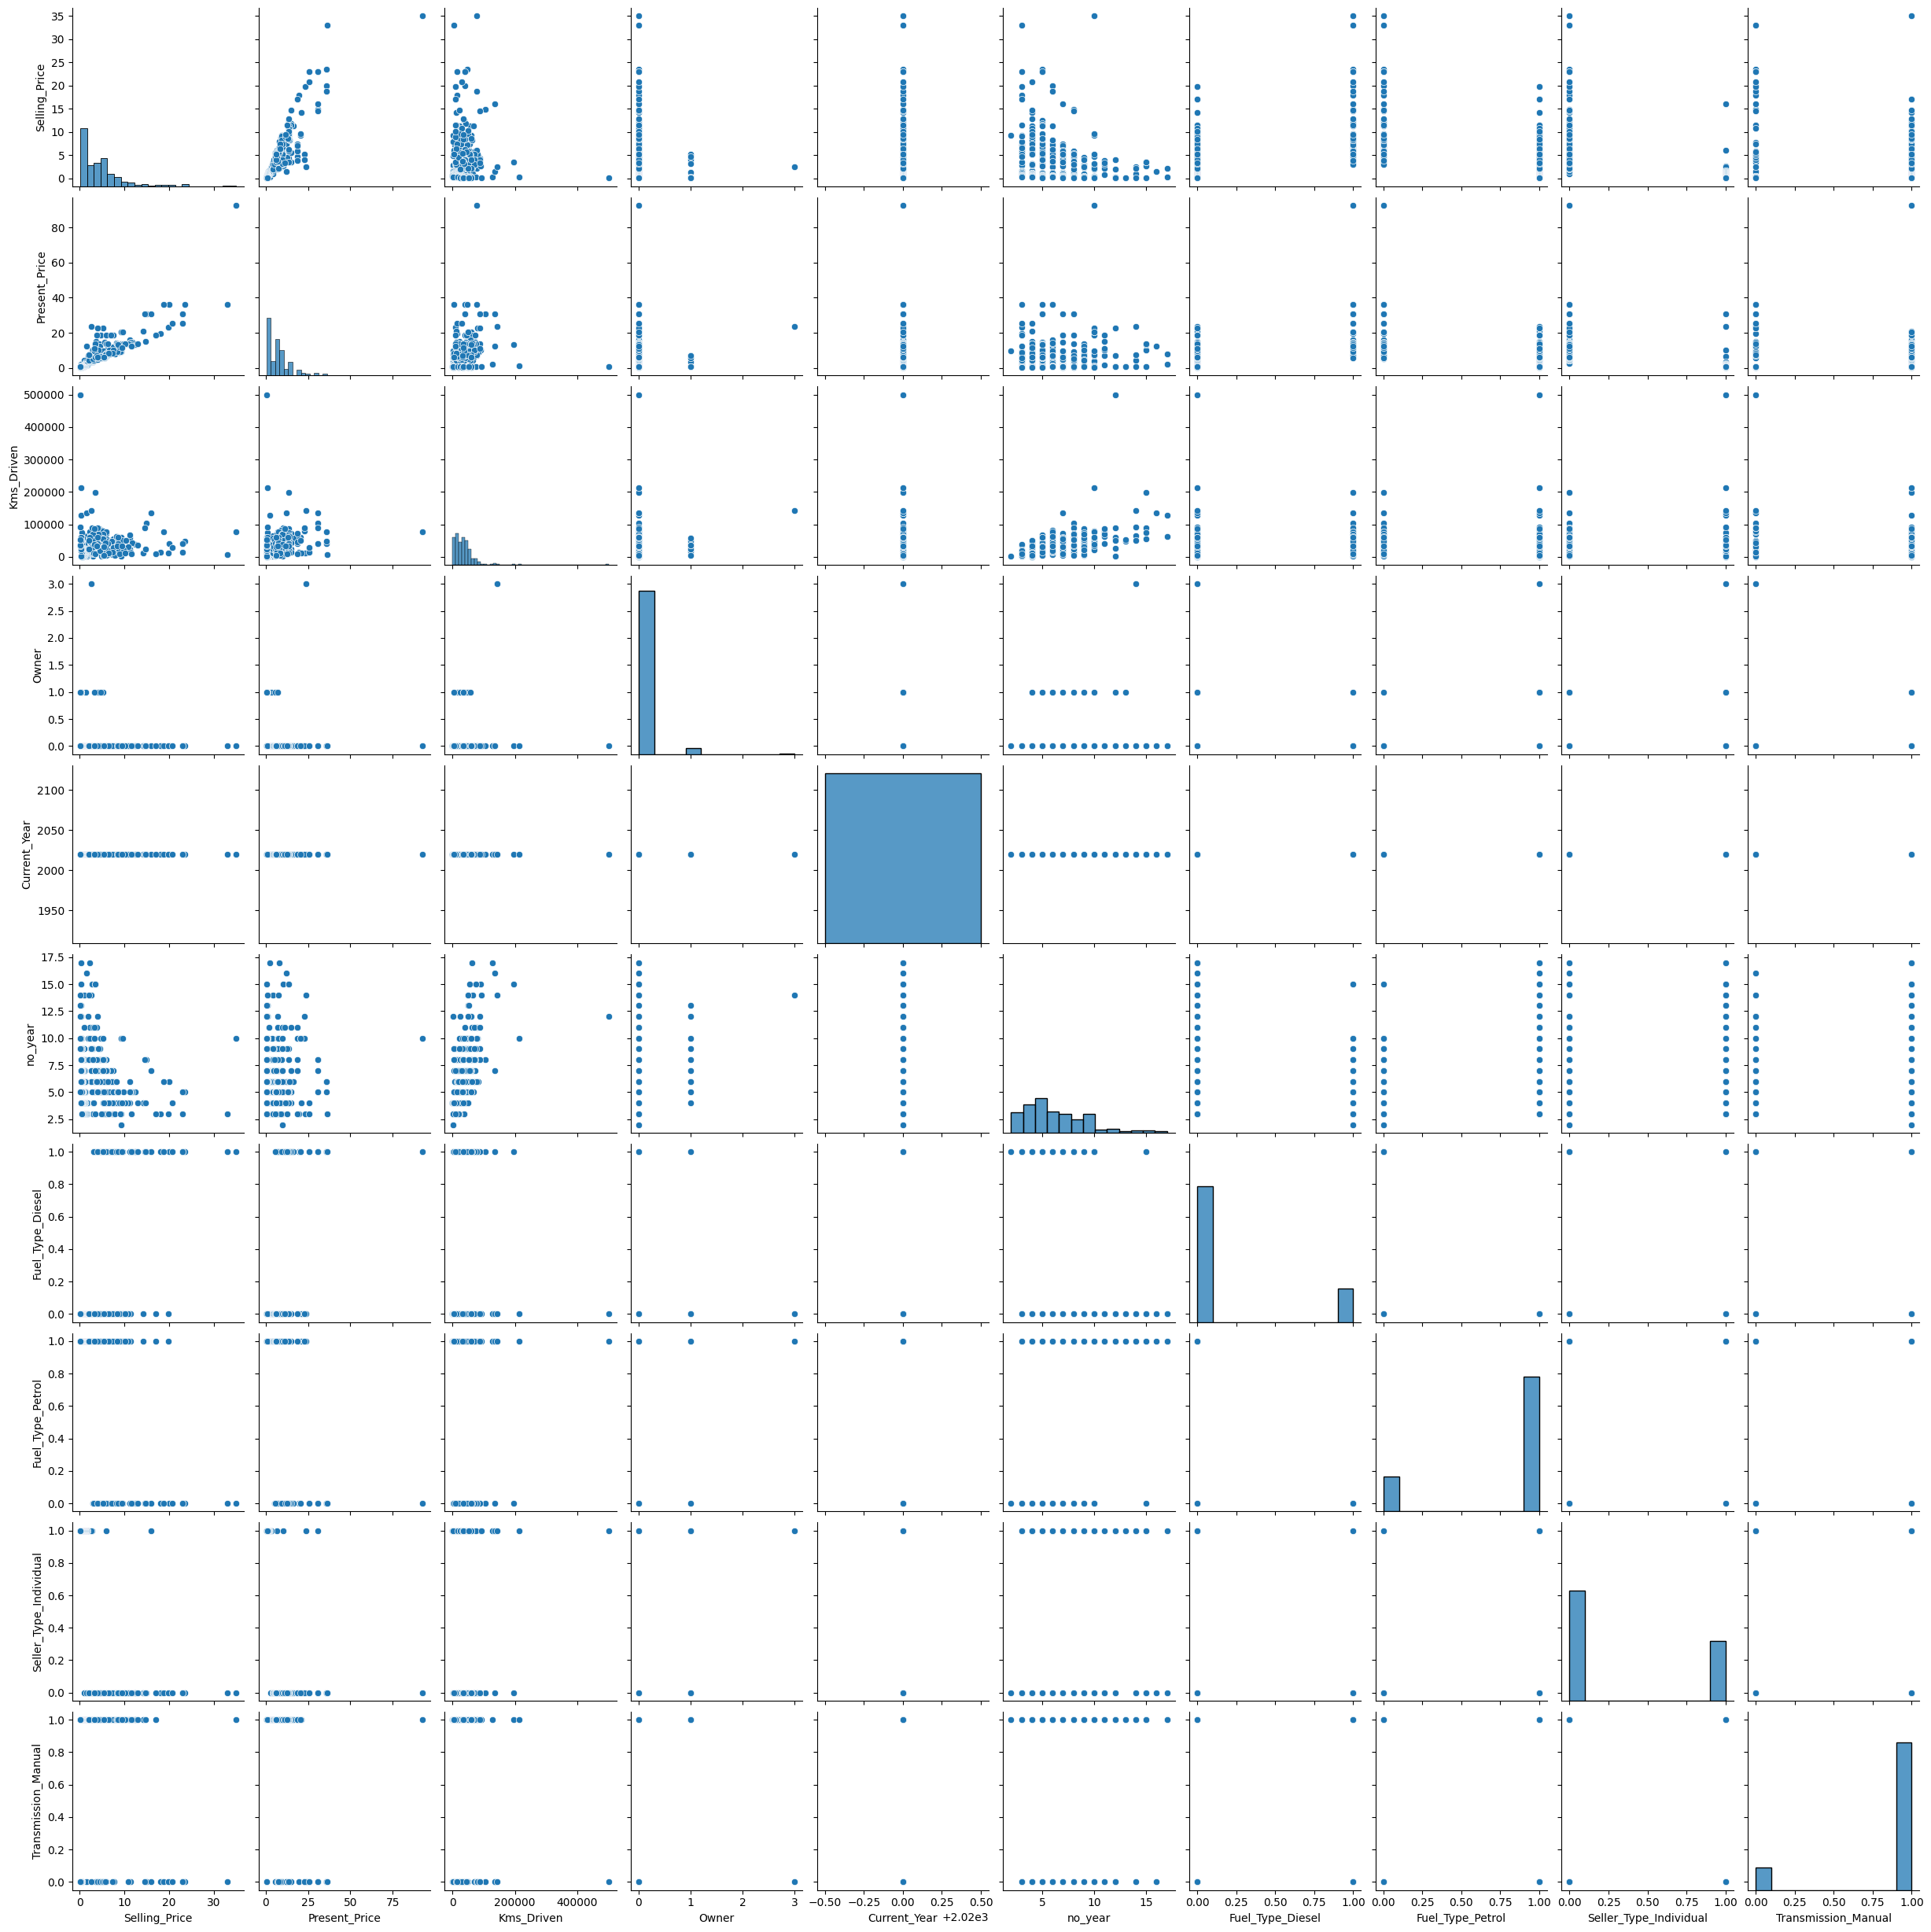

In [ ]:
sns.pairplot(final_dataset)

# **Data Visualization through Correlation Matrix**

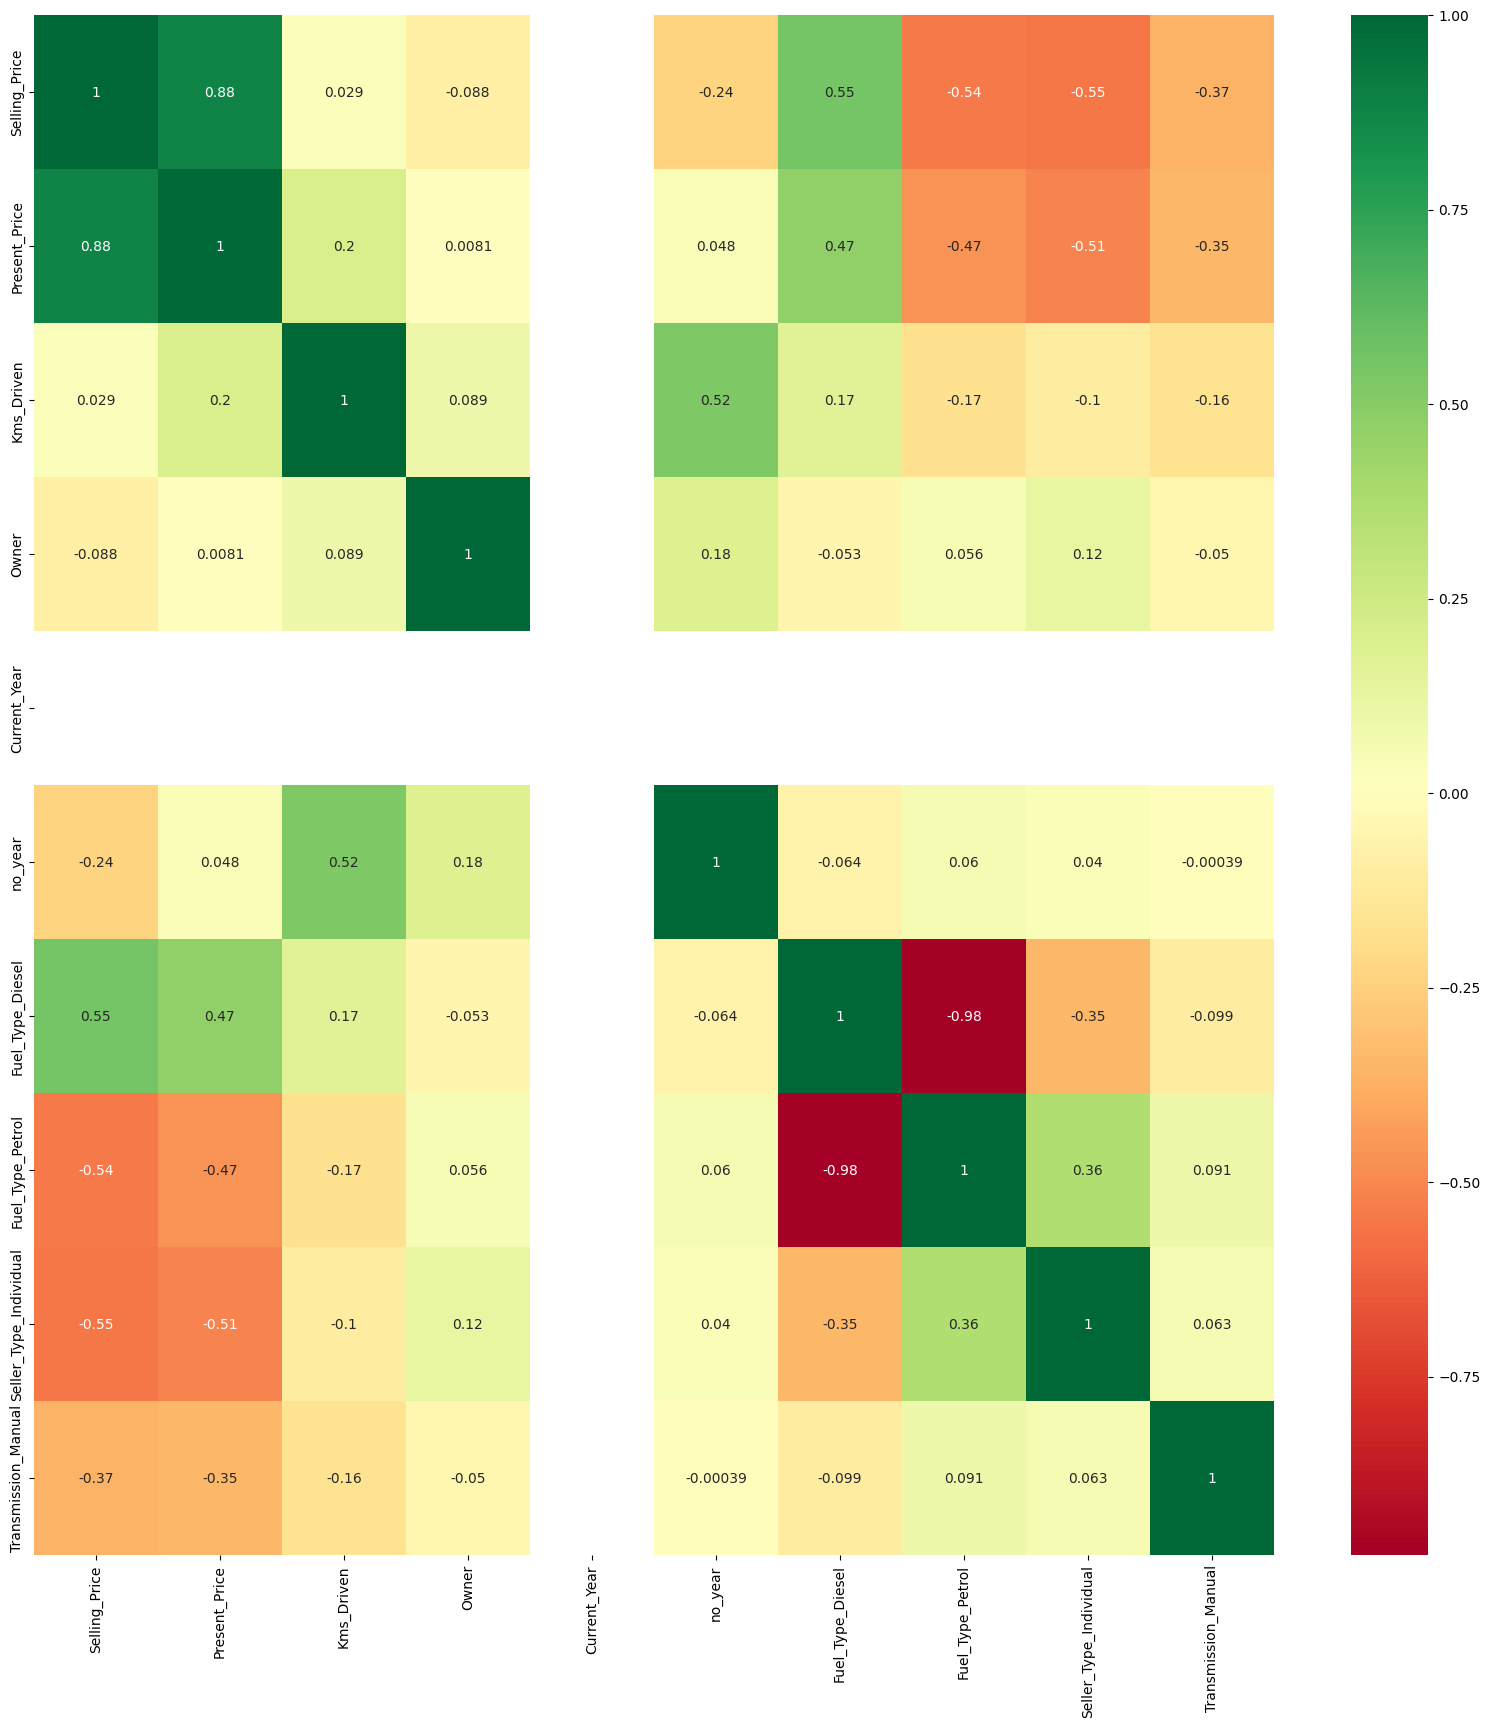

In [ ]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

# **Store Feature Matrix in X and Response(Target) In Vector y**

In [ ]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

# **Display Top 5 Feature Matrix of X**

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2020,6,False,True,False,True
1,9.54,43000,0,2020,7,True,False,False,True
2,9.85,6900,0,2020,3,False,True,False,True
3,4.15,5200,0,2020,9,False,True,False,True
4,6.87,42450,0,2020,6,True,False,False,True


# **Display Top 5 Vector of y**

In [ ]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


# **Extra Trees Regressor**

In [ ]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

# **Prediction of the Model through ExtraTreesRegressor**

In [ ]:
print(model.feature_importances_)

[0.37334507 0.03855779 0.00044164 0.         0.07639689 0.24311459
 0.00848617 0.11858817 0.14106967]


# **Data Visualization through Barplot**

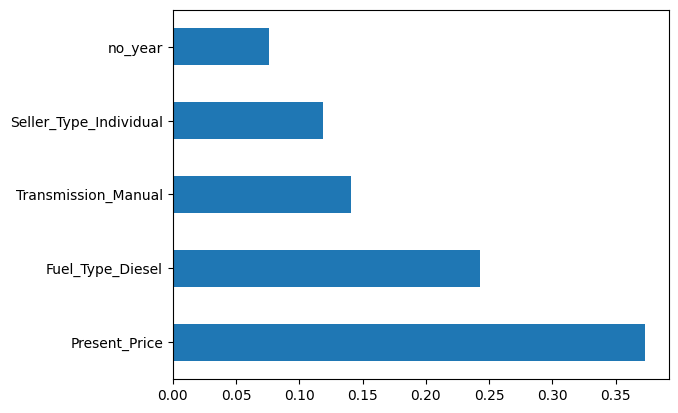

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


# **Splitting The Dataset Into The Train Set And Test Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Check The Number Of Rows And Columns in X_train**

In [ ]:
X_train.shape

(240, 9)

# **Random Forest Regressor**

In [ ]:
rf_random=RandomForestRegressor()

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100, stop = 1200, num = 12)]

In [ ]:
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Numbers of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

# **Fitting The Model**

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
predictions=rf_random.predict(X_test)

# **Showing Predictions Through RandomForestRegressor**

In [ ]:
predictions

array([ 7.12234 ,  0.52644 ,  4.87101 ,  8.69263 , 16.65147 ,  5.27141 ,
        3.31525 ,  0.70772 ,  4.4896  ,  4.65355 ,  2.84726 ,  0.85233 ,
        4.97676 ,  7.8123  ,  7.89889 , 12.13674 ,  7.24898 ,  4.01019 ,
        0.48706 ,  1.4906  ,  3.67947 ,  4.88046 ,  5.4869  ,  9.33934 ,
        0.21096 ,  0.73631 ,  0.40507 ,  0.63111 ,  0.49869 ,  4.70473 ,
        4.80296 ,  5.7811  ,  0.49662 ,  8.29647 ,  3.56578 ,  1.21366 ,
        5.62654 ,  6.80312 ,  0.24985 ,  8.73601 , 10.13796 , 21.3068  ,
        5.03507 ,  4.192805,  5.48585 , 11.64511 ,  0.32105 ,  0.87073 ,
        5.1392  ,  7.47525 ,  7.33307 ,  3.35807 ,  4.96005 , 22.72953 ,
        1.12116 ,  1.06437 ,  0.60766 ,  2.5443  ,  3.48135 ,  1.36335 ,
        3.85588 ])

# **Data Visualization of y_test through Barplot**

<Axes: xlabel='Selling_Price', ylabel='Density'>

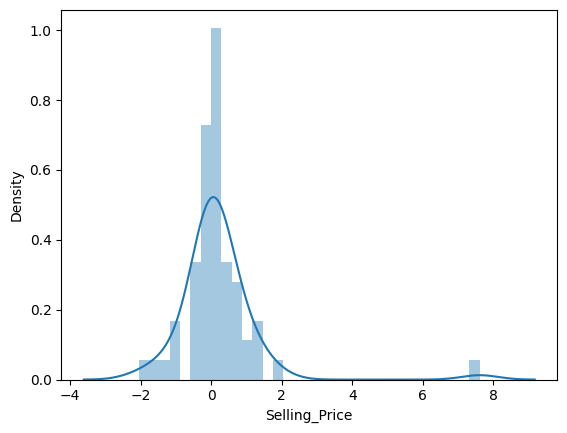

In [ ]:
sns.distplot(y_test-predictions)

# **Data Visualization through Scatterplot**

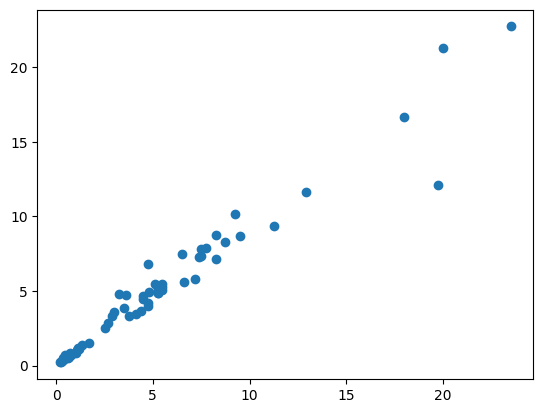

In [ ]:
plt.scatter(y_test,predictions)

# **Conclusion**

**So, from this dataset we observe how our dataset look like number of rows and columns in our dataset, checking the null values, statistical measure of our dataset , replace and drop the columns. We also split this dataset into train set and test set. We also perform various machine learning algorthmns like Random Tree Regressor and Extra Trees Regressor in which we fit the model and make the predictions. We also perform data visualization as we can see above in form of barplot, correlation matrix etc.**